<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<h2>Read Dataset</h2>

In [2]:
data_set=pd.read_pickle("fact_bookings.pickle")
property_set=pd.read_pickle("dim_hotels.pickle")
data_set.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
property_set.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Delhi
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


<h2>Dataset Basic Information</h2>

In [4]:
data_set=pd.merge(data_set,property_set,on='property_id',how='left')

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [6]:
data_set.shape

(134590, 15)

<h2>Statistics Information</h2>

In [7]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,134590.0,18061.113493,1093.055847,16558.0,17558.0,17564.0,18563.0,19563.0
no_guests,134590.0,2.036808,1.031766,1.0,1.0,2.0,2.0,6.0
ratings_given,56683.0,3.619004,1.235009,1.0,3.0,4.0,5.0,5.0
revenue_generated,134590.0,14916.013188,6452.868072,6500.0,9900.0,13500.0,18000.0,45220.0
revenue_realized,134590.0,12696.123256,6928.108124,2600.0,7600.0,11700.0,15300.0,45220.0


In [8]:
data_set.describe(include="object").T

,count,unique,top,freq
booking_id,134590,134590,May012216558RT11,1
booking_date,134590,116,2022-06-08,1670
check_in_date,134590,92,2022-07-16,2017
checkout_date,134590,97,2022-05-09,1840
room_category,134590,4,RT2,49505
booking_platform,134590,7,others,55066
booking_status,134590,3,Checked Out,94411
property_name,134590,7,Atliq Palace,23625
category,134590,2,Luxury,83660
city,134590,4,Mumbai,36117


In [9]:
data_set.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
property_name            0
category                 0
city                     0
dtype: int64

In [10]:
data_set.fillna(0,inplace=True)

<h2>Removal of Duplicates and Dropping of Unwanted Data</h2>

In [11]:
data_set.duplicated().sum()

0

In [12]:
#Removal Of Unwanted Data
data_set=data_set.drop(columns=['booking_id','revenue_realized'])

<h2>Explanatory Data Analysis and Preprocessing</h2>

In [13]:
data_set.columns

Index(['property_id', 'booking_date', 'check_in_date', 'checkout_date',
       'no_guests', 'room_category', 'booking_platform', 'ratings_given',
       'booking_status', 'revenue_generated', 'property_name', 'category',
       'city'],
      dtype='object')

<h2>Values in Categorical values</h2>

In [14]:
data_set=data_set.assign(no_days_book_to_checkin=None,no_days_checkin_checkout=None,rev_person=None,booking_month=None,check_month=None,no_weekend=None,is_cancelled=None)

In [15]:
#Finding the number of days from booking_date and check_in_date
def no_of_days_between(from_date,to_date,weekend):
    booking_checkin=[]
    for c in range (len(data_set)):
        holiday=0
        f_date=datetime.datetime.strptime(data_set[from_date][c], '%Y-%m-%d').date()
        t_date=datetime.datetime.strptime(data_set[to_date][c], '%Y-%m-%d').date()
        no_days=t_date-f_date
        booking_checkin.append(no_days.days)
        delta=datetime.timedelta(days=1)
        if weekend==True:
            while (f_date<=t_date):
                f_date+=delta
                if(f_date.weekday()>=5):
                    holiday+=1
            no_week.append(holiday)
    return(booking_checkin)

In [16]:
categorical_data=['property_id','no_guests','room_category','booking_status','property_name','category','city','booking_month','check_month']

In [17]:
for i in categorical_data:
    data_set[i]=data_set[i].astype("object")

<h3> Feature Engineering </h3>
<h5> New Feature: rev_person is the revenue_generated per no_guests </h6>
<h5> New Feature: no_days_book_to_checkin is the number of the days between booking date and check in date </h6>
<h5> New Feature: no_days_checkin_checkout is the number of the days between check in date and checkout date </h6>
<h5> New Feature: book_month is the month of the booking date </h6>
<h5> New Feature: check_month is the month of check in and checkout date </h6>

In [18]:
no_week=[]
data_set["no_days_book_to_checkin"]=no_of_days_between('booking_date','check_in_date',weekend=False)
data_set["no_days_checkin_checkout"]=no_of_days_between('check_in_date','checkout_date',weekend=True)
data_set["no_weekend"]=no_week
data_set["booking_month"]=data_set['booking_date'].apply(lambda x:x.split("-")[1])
data_set["check_month"]=(data_set['check_in_date'].apply(lambda x:x.split("-")[1]).astype(int)+data_set['checkout_date'].apply(lambda x:x.split("-")[1]).astype(int))/2

In [19]:
for column in categorical_data:
    print(data_set[column].value_counts().sort_values(ascending=False))
    print('\n')

property_id
16559    7338
18562    7333
16563    7147
18560    6638
18561    6458
17563    6337
17559    6142
17560    6013
19560    5979
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5036
16562    4820
18563    4728
19559    4705
16560    4693
18558    4475
16561    4418
19558    4371
17564    3982
17562    3424
16558    3153
Name: count, dtype: int64


no_guests
2    60223
1    44313
3    15122
4    12096
6     1445
5     1391
Name: count, dtype: int64


room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64


booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64


property_name
Atliq Palace     23625
Atliq Exotica    23441
Atliq City       23323
Atliq Blu        21795
Atliq Bay        21389
Atliq Grands     17035
Atliq Seasons     3982
Name: count, dtype: int64


category
Luxury      83660
Business    50930
Name: count, dtype: int64


city
Mumbai       36117
Hydera

<h1> Outlier Detection and Removal</h1>

<Axes: ylabel='revenue_generated'>

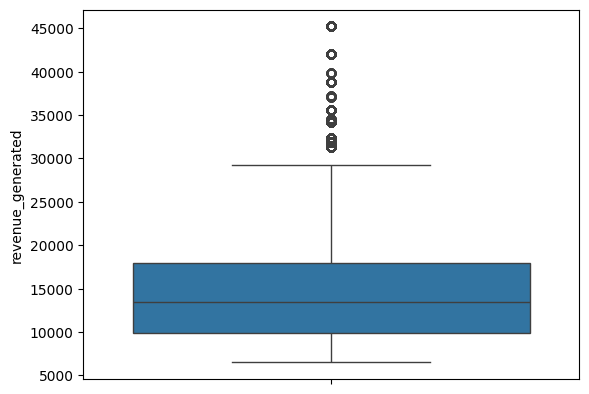

In [20]:
sns.boxplot(data_set['revenue_generated'])

<Axes: ylabel='no_days_book_to_checkin'>

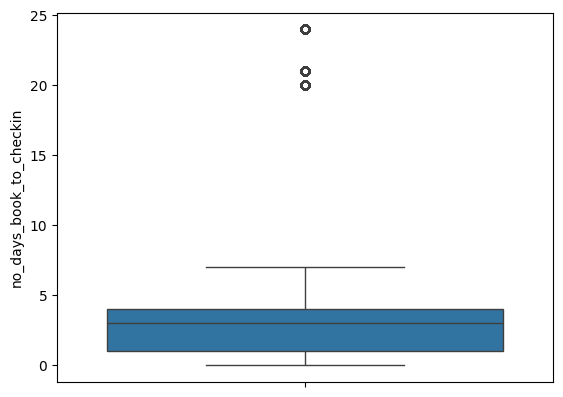

In [21]:
sns.boxplot(data_set['no_days_book_to_checkin'])

In [22]:
def iqr_method(outlier):
    #Removing Outliers using IQR Method
    q1=data_set[outlier].quantile(0.25)
    q3=data_set[outlier].quantile(0.75)
    iqr=q3-q1
    upper_limit = q3 + (1.5*iqr)
    lower_limit = q1 - (1.5*iqr)
    #capping
    data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit
    data_set.loc[(data_set[outlier]<lower_limit),outlier]=lower_limit

In [23]:
iqr_method('revenue_generated')
iqr_method('no_days_book_to_checkin')

C:\Users\donku\AppData\Local\Temp\ipykernel_14192\1941874273.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit


<Axes: ylabel='no_days_book_to_checkin'>

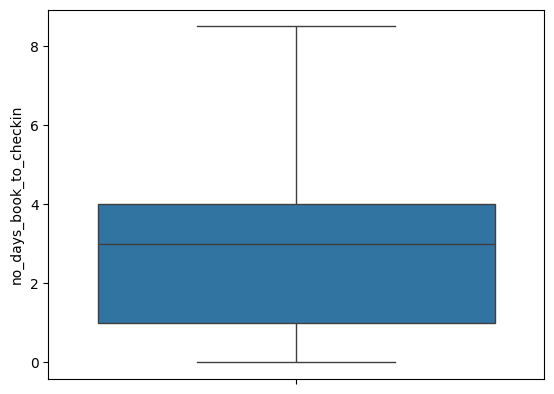

In [24]:
sns.boxplot(data_set['no_days_book_to_checkin'])

<Axes: ylabel='revenue_generated'>

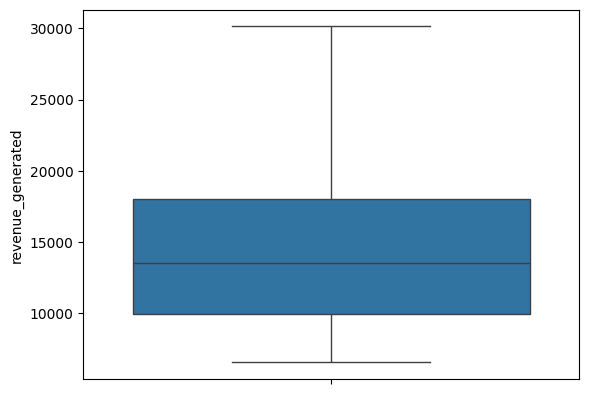

In [25]:
sns.boxplot(data_set['revenue_generated'])

In [26]:
data_set["rev_person"]=data_set["revenue_generated"]/data_set["no_guests"]

In [27]:
data_set["is_cancelled"]=data_set["booking_status"].map({'Checked Out':0,'No Show':1,'Cancelled':1})

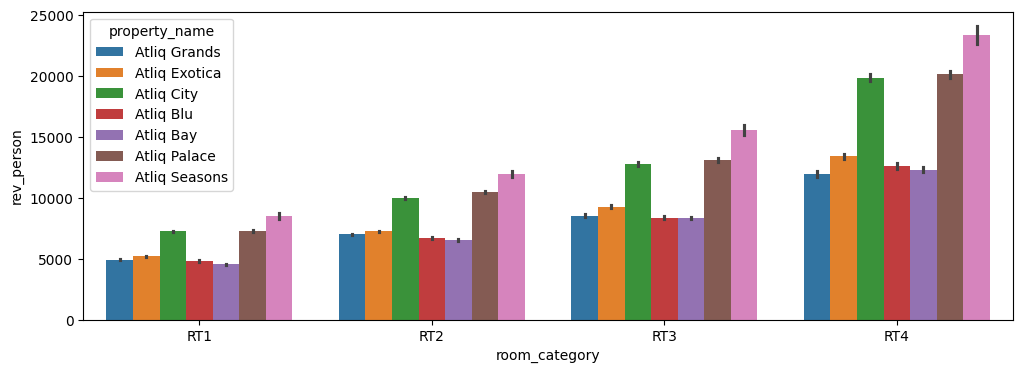

In [28]:
plt.figure(figsize=(12,4))
sns.barplot(data=data_set, x="room_category",y="rev_person",hue="property_name")
plt.show()

In [29]:
#Removal of Data which is done after feature generation
data_set=data_set.drop(columns=['booking_date','check_in_date','checkout_date'],axis=0)

<h5> Behaviour of booking_status based on input variables </h5>
<h5> Out of 134590 reservation, Checked Out - 94411, Cancelled -  33420 , No Show - 6579</h5>
<h5> The output variable is considered on the basis of room cancellation,</h5> 
<h5> So a new columns has been created 'is_cancelled' which considers Cancelled and No Show as 1 while the Checked Out as 0  </h5>
<h5> Out of the seven hotels, Atliq Season charges more for their rooms compared to others. </h5>
<h5> Most reservation are booked for two guests and the room category (RT2) </h5>
<h5> Most of the reservation are reserved through other means </h5>
<h5> Luxury type hotels are reserved more than the Business ones </h5>
<h5> Most people reserve their rooms for one day and book them within three days before the check-in date </h5>

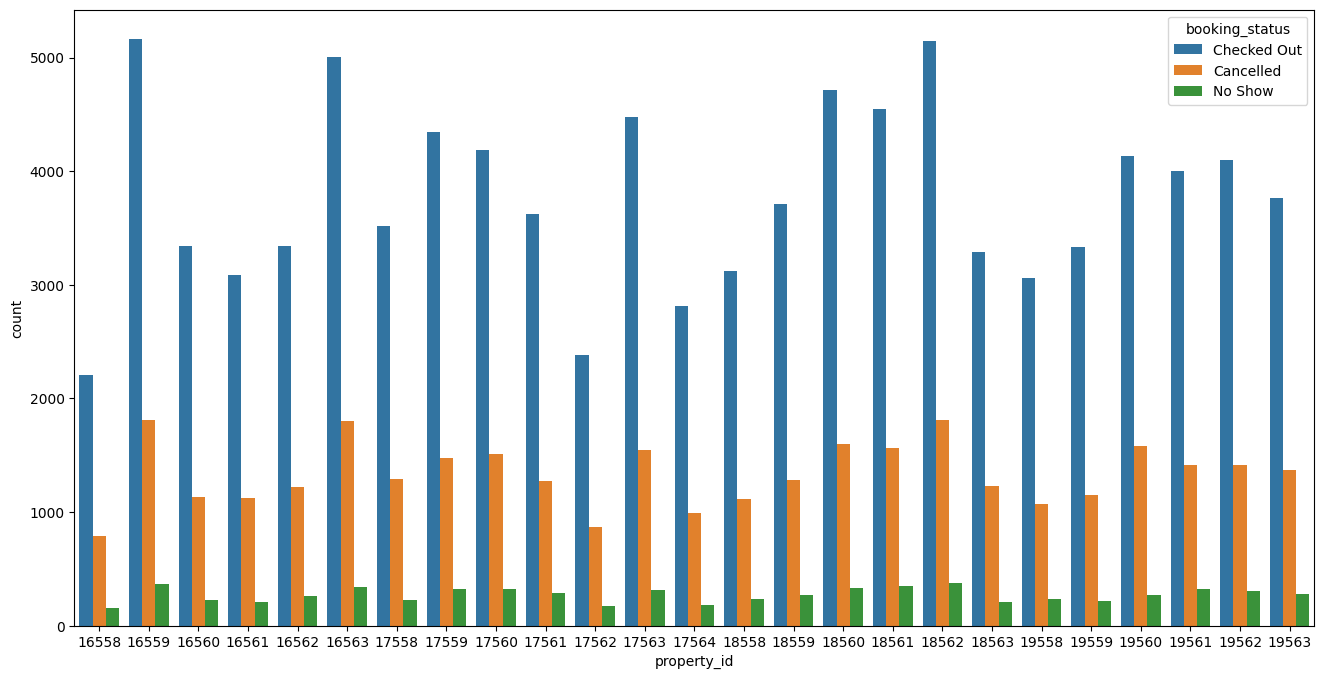

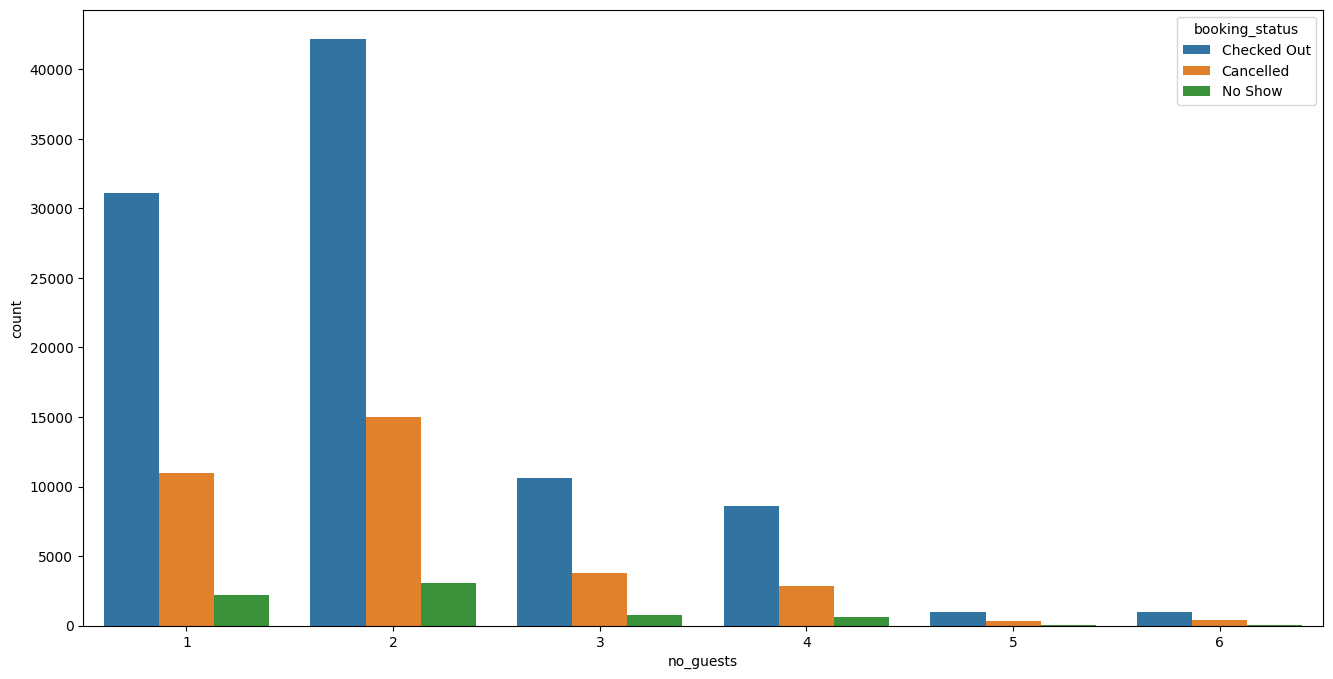

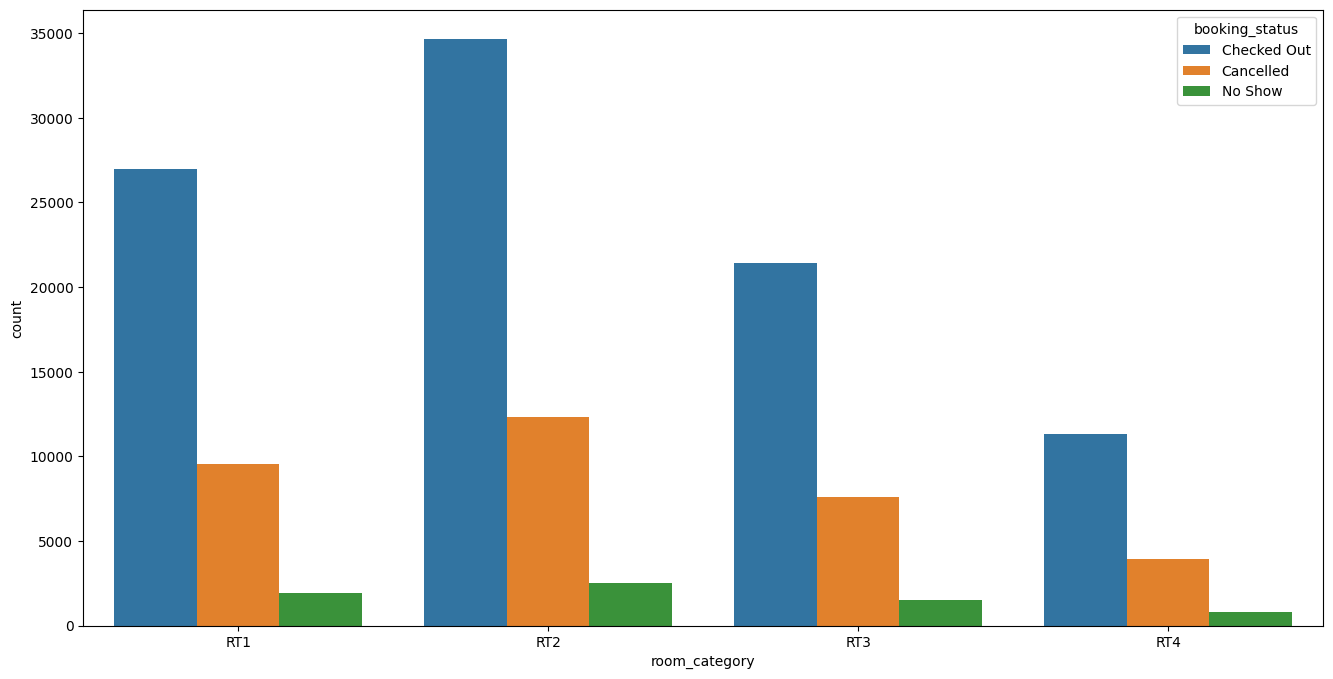

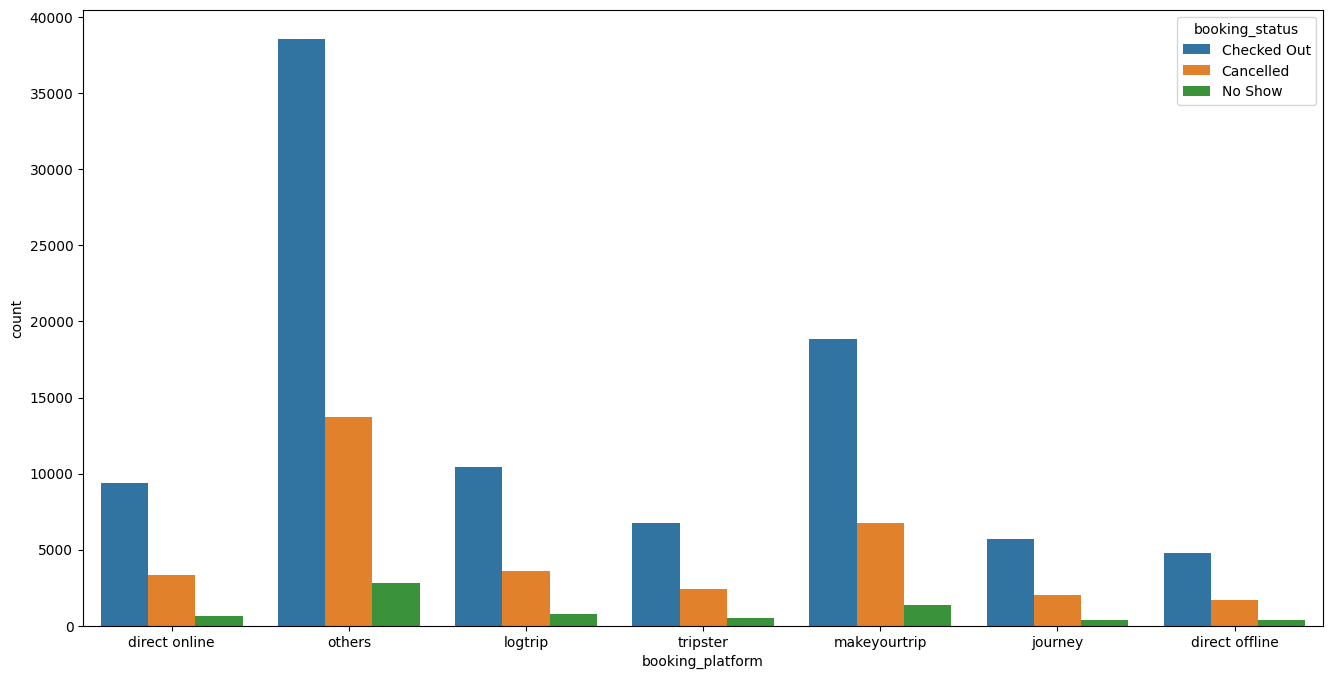

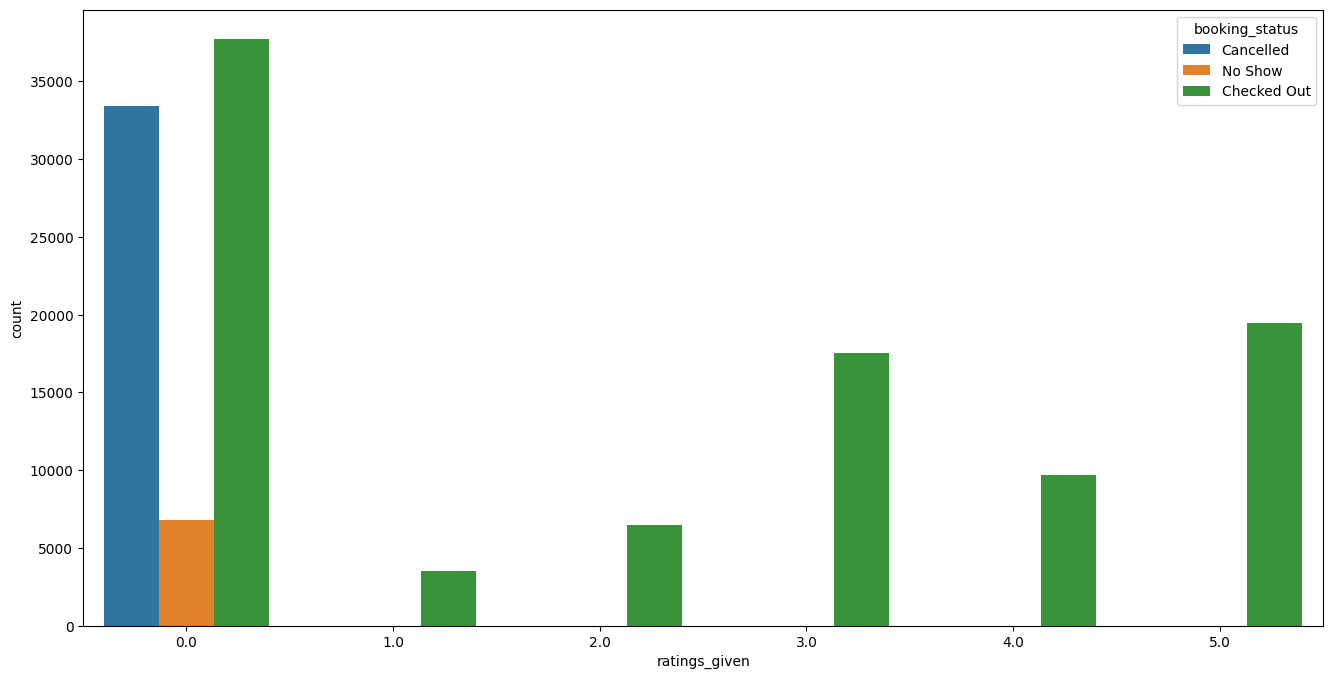

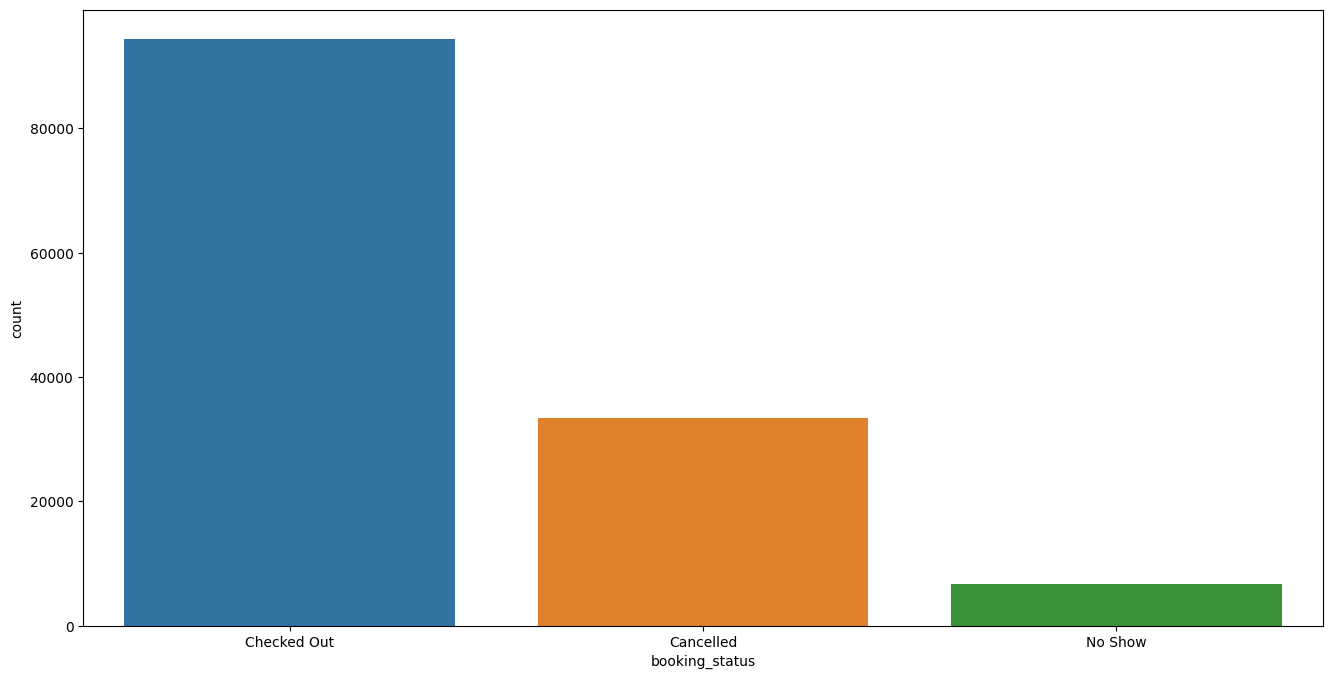

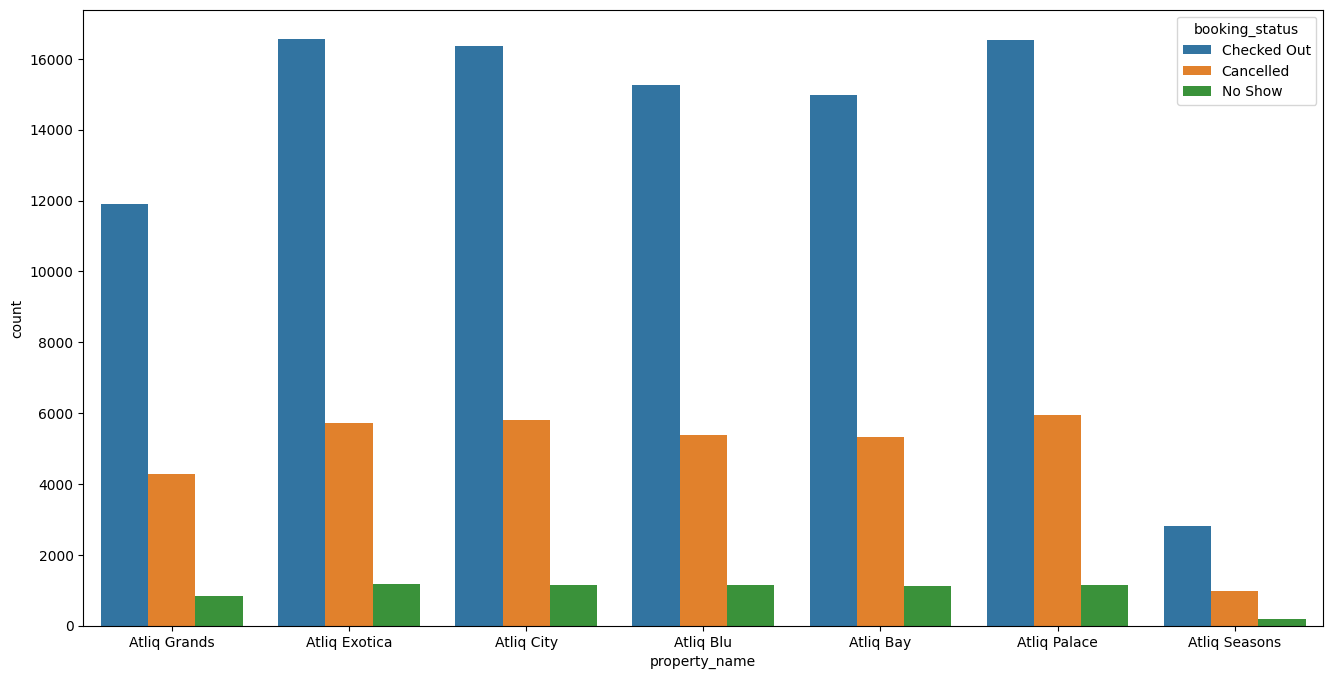

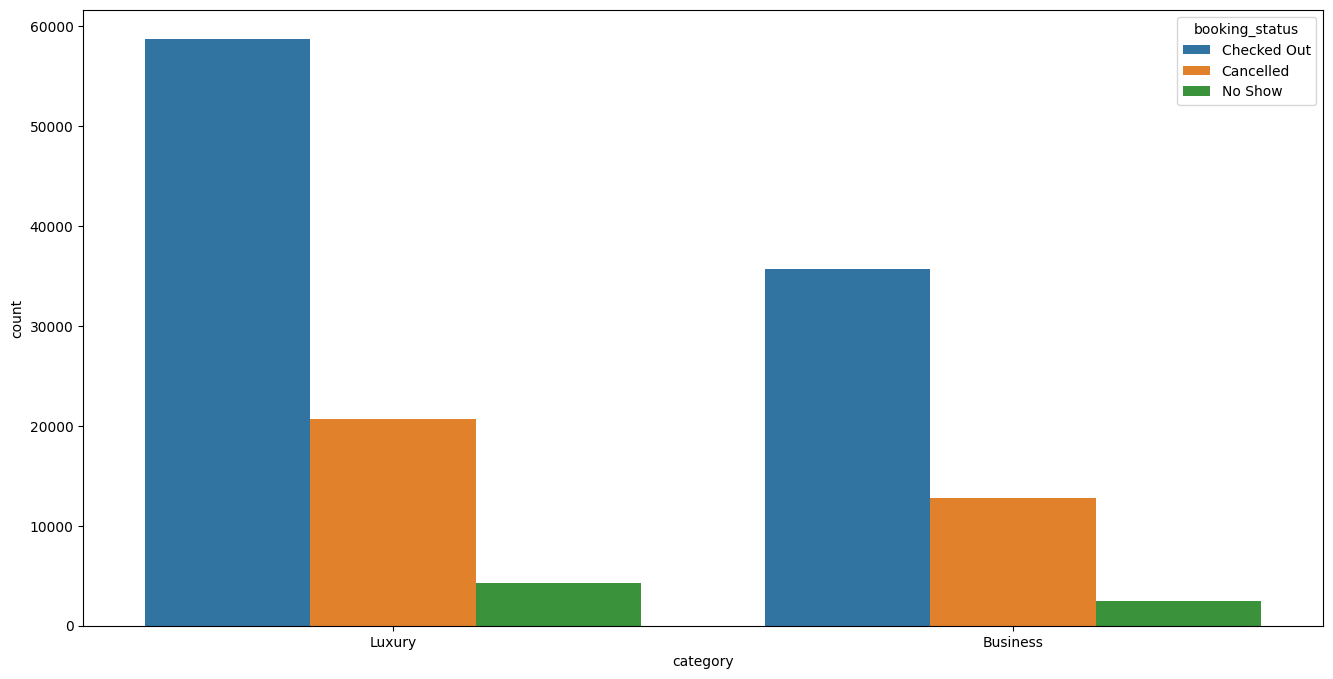

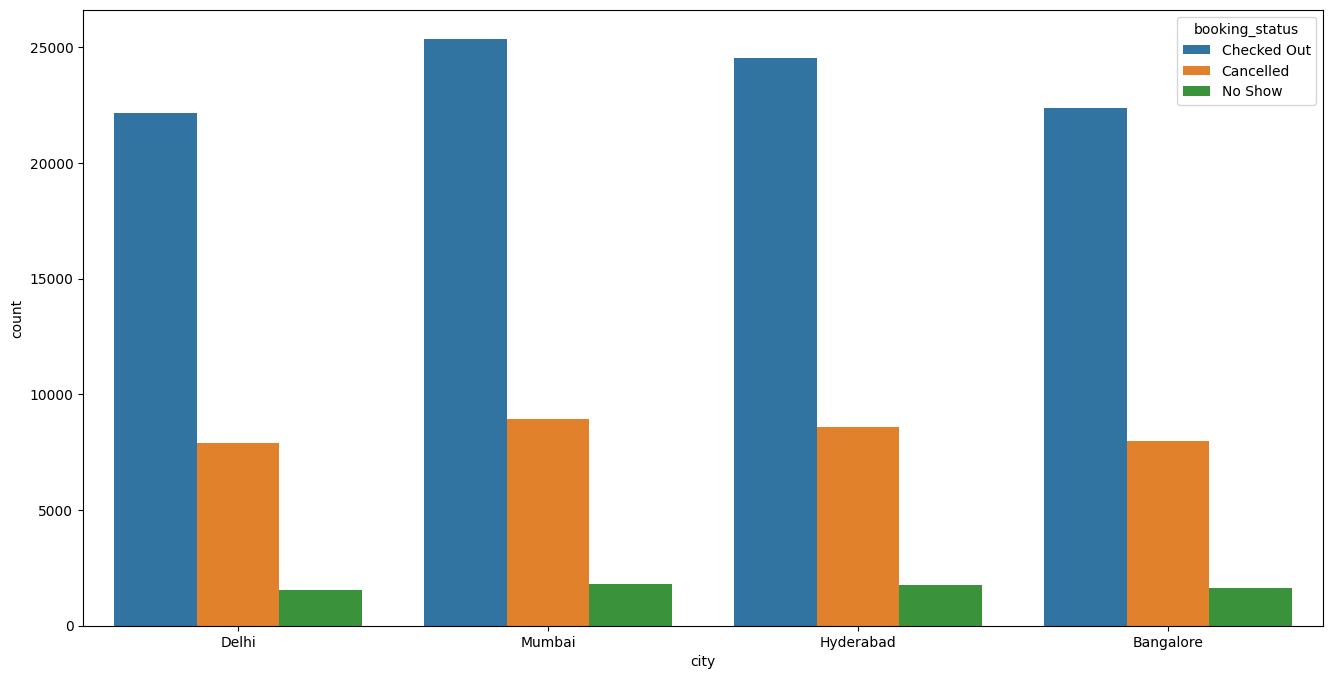

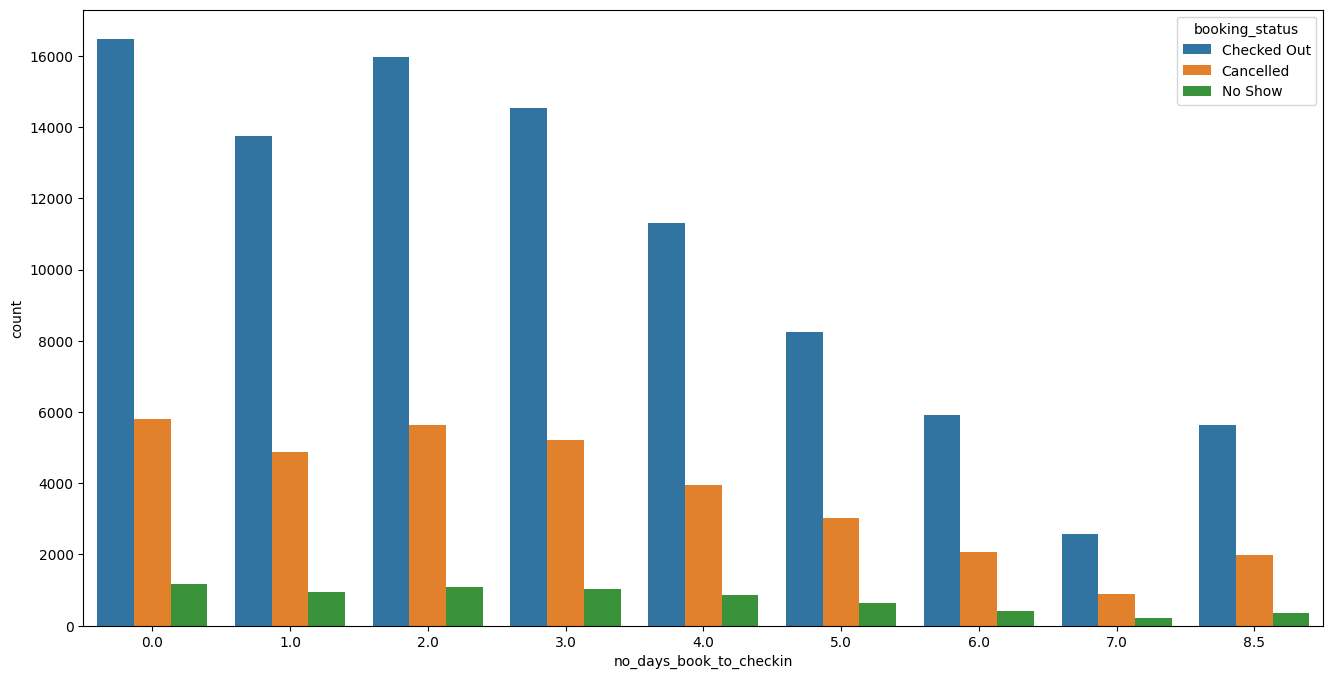

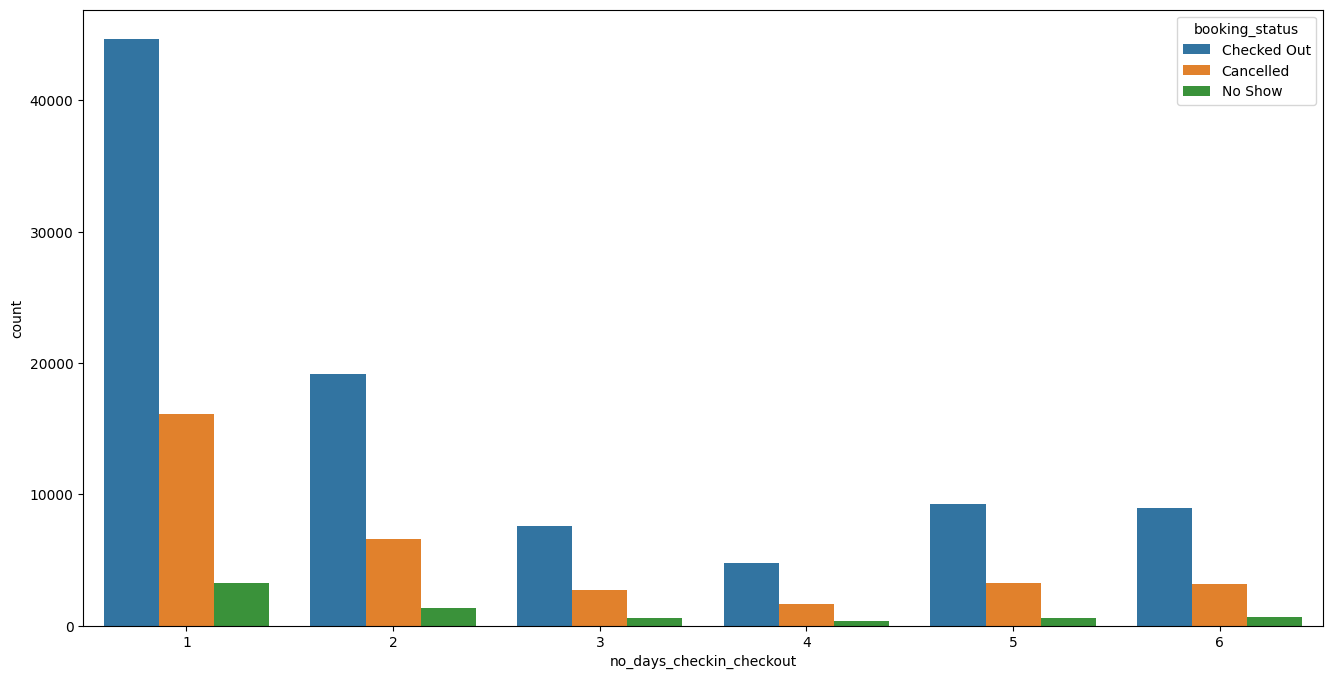

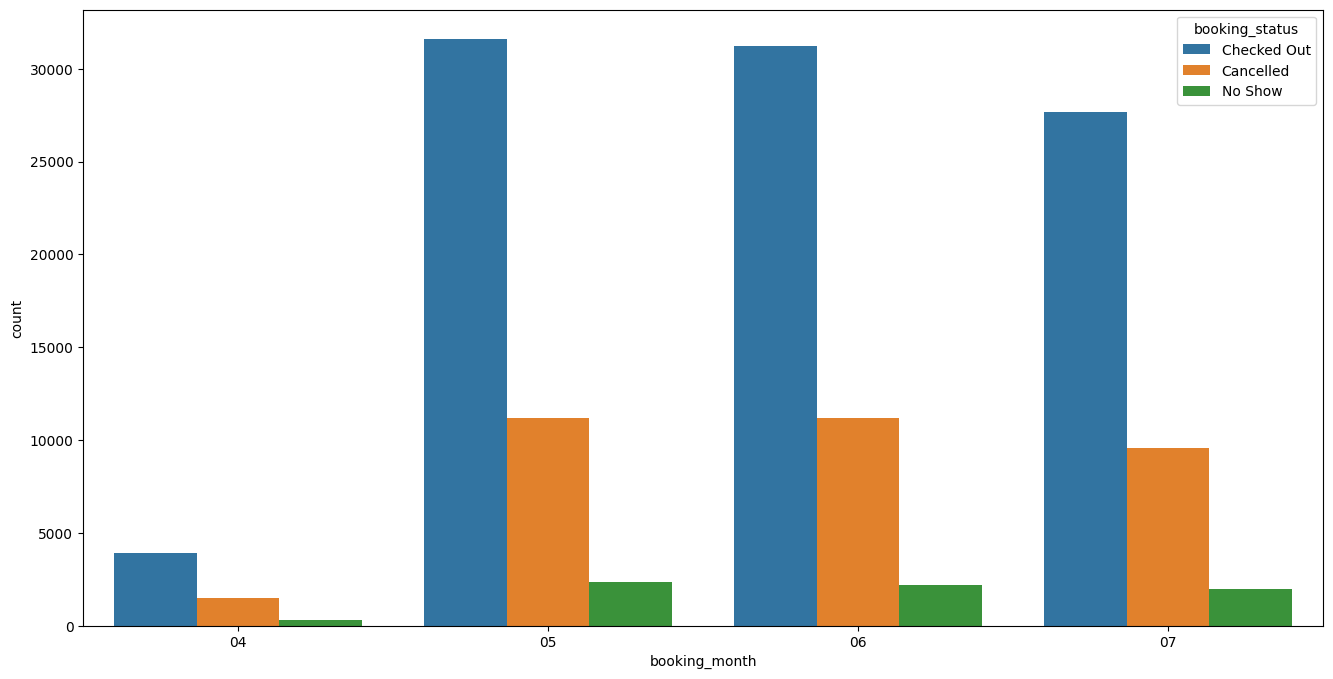

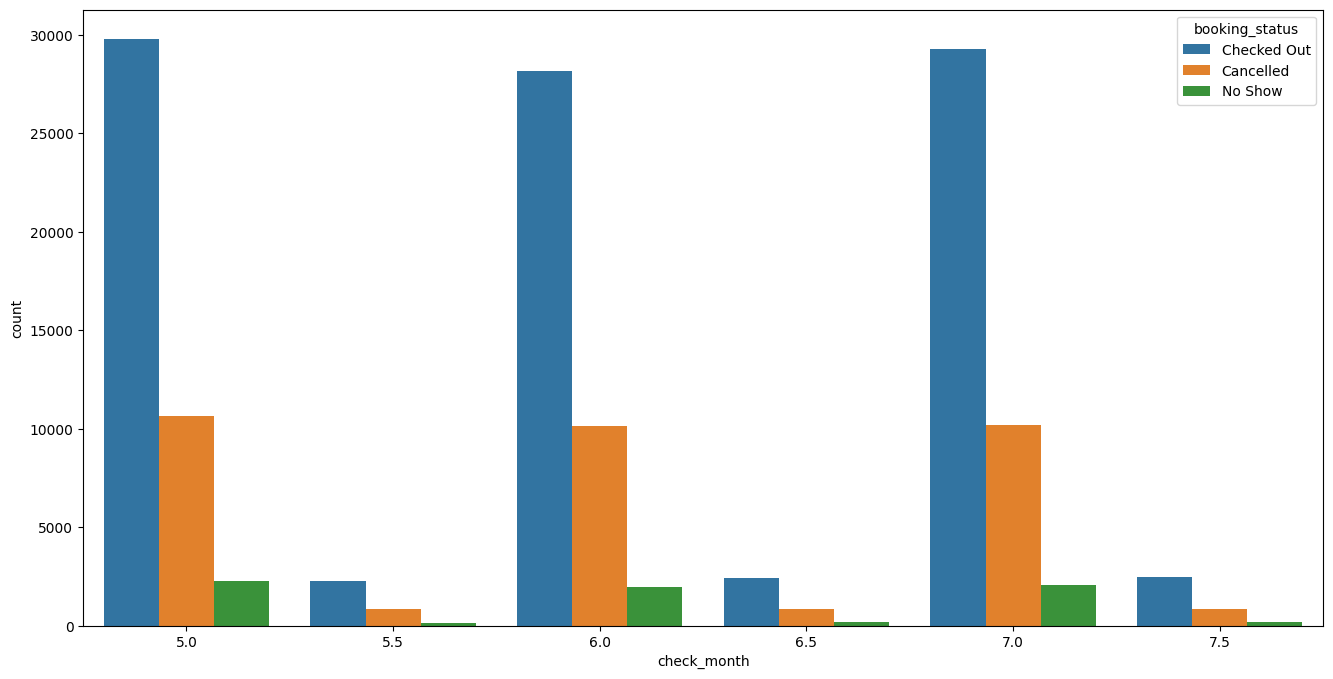

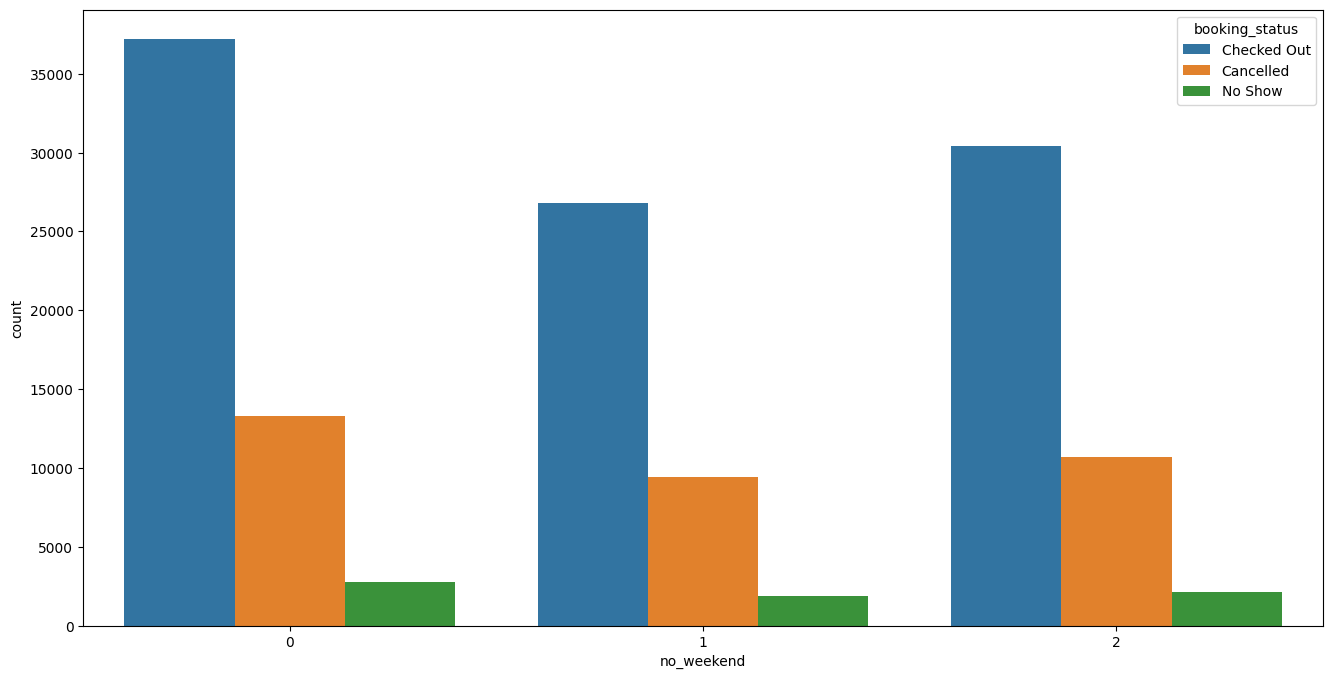

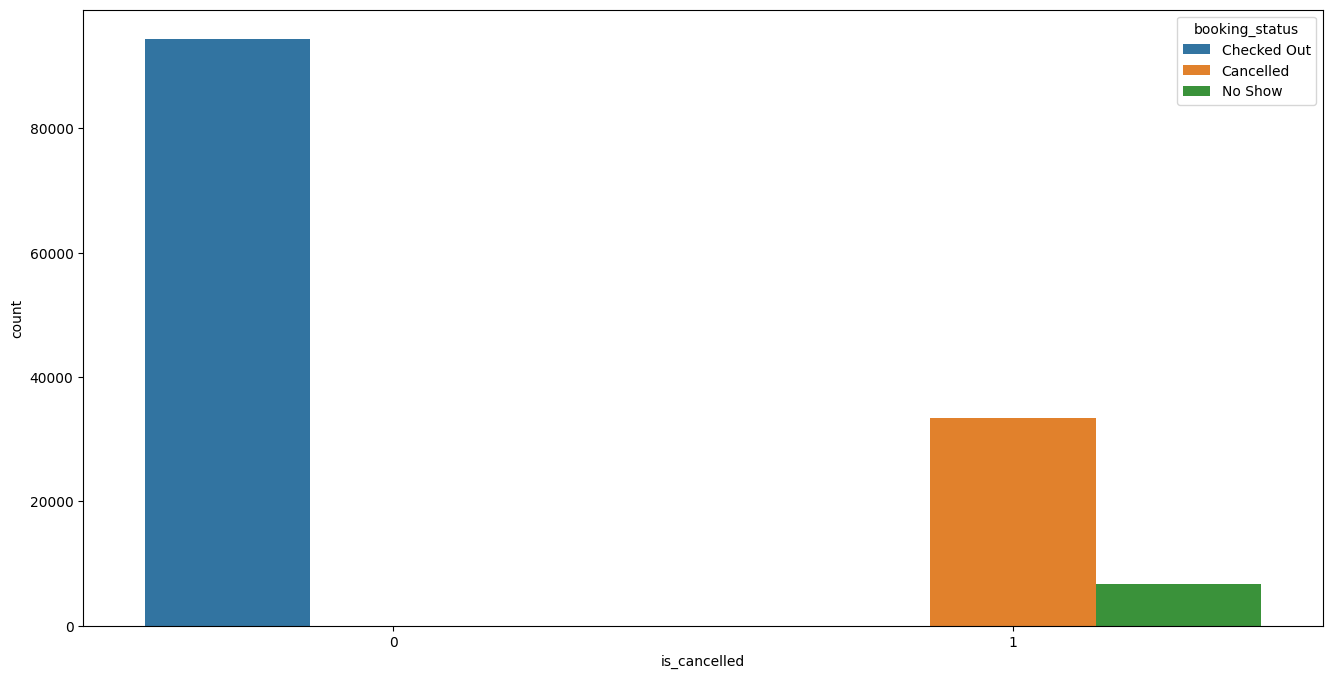

In [30]:
for column in data_set.columns:
    if (column!='revenue_generated' and column!='rev_person'):
        plt.figure(figsize=(16,8))
        sns.countplot(data_set,x=column,hue='booking_status')
        plt.show() 

<Axes: ylabel='count'>

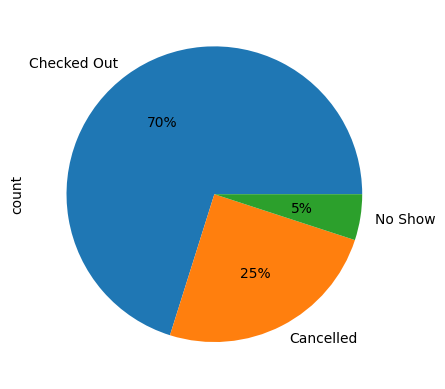

In [31]:
data_set.booking_status.value_counts().plot(kind='pie',autopct='%1.0f%%')

<Axes: ylabel='count'>

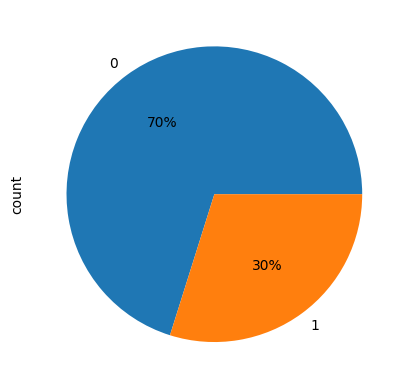

In [32]:
data_set.is_cancelled.value_counts().plot(kind='pie',autopct='%1.0f%%')

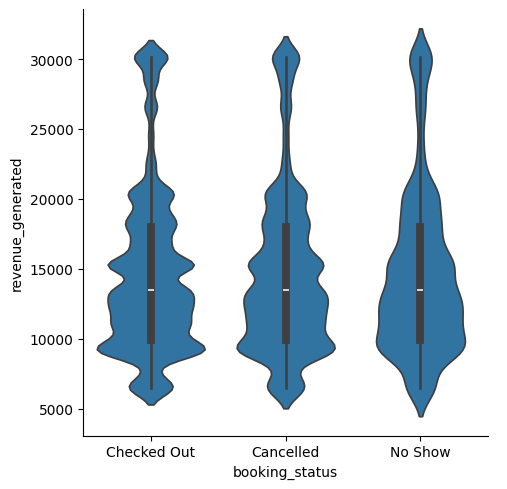

In [33]:
sns.catplot(y= 'revenue_generated', x = 'booking_status', data = data_set, kind = 'violin')

<h1>Encoding Categorical Data</h1>

In [34]:
data_set["category"]=data_set["category"].map({'Luxury':1,'Business':0})

In [35]:
label_encoder = LabelEncoder()
for feature in data_set.columns:
    if data_set[feature].dtypes == 'object' and feature!='property_id':
        data_set[feature]=label_encoder.fit_transform(data_set[feature])

In [36]:
data_set["city"].unique()

array([1, 3, 2, 0])

<h1>Feature Selection</h1>

In [37]:
#Feature Selection - Dropping constant features (Constant Features which aren't relevant to the output is removed)
data_set=data_set.drop(columns='booking_status')
#data_set=pd.get_dummies(data_set,columns=["room_category","booking_platform","city",'property_name'])
data_set_X=data_set.drop(columns='is_cancelled')
data_set_Y=data_set['is_cancelled']

<Axes: >

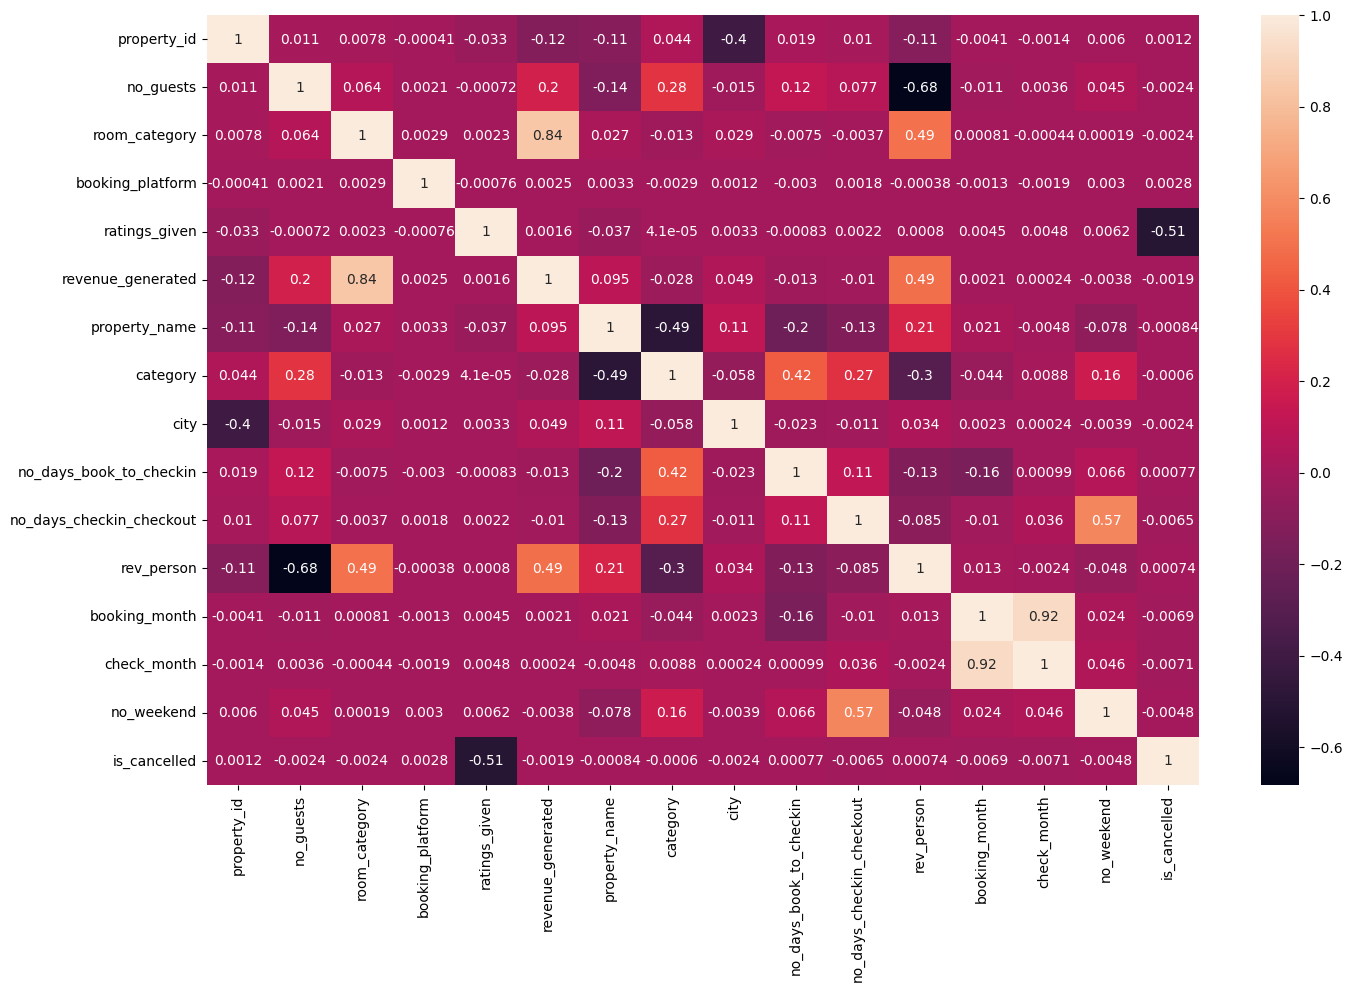

In [38]:
corelation = data_set.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

In [39]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features=correlation(data_set_X,0.6)
data_set_X=data_set_X.drop(corr_features,axis=1)
corr_features

{'check_month', 'rev_person', 'revenue_generated'}

<h3> Splitting the Dataset into Train and Test Dataset</h1>

In [41]:
scaler=StandardScaler()
data_set_X=scaler.fit_transform(data_set_X)

In [42]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(data_set_X,data_set_Y,train_size=0.7,random_state=1)

<h3> Choosing the Model for Classification Model </h1>

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score
dtc=DecisionTreeClassifier(random_state=0)

In [44]:
def model_analyze(model):
    model.fit(train_X,train_Y)
    pred_Y = model.predict(test_X)
    pred_train_Y = model.predict(train_X)
    print("\n--------------------Training Set--------------------\n")
    print(classification_report(train_Y,pred_train_Y))
    print("\n----------------------Test Set----------------------\n")
    print(classification_report(test_Y, pred_Y))
    ConfusionMatrixDisplay.from_estimator(model,test_X,test_Y,colorbar=True)
    plt.title(" Confusion Matrix")
    plt.show()
    model_train_auc = roc_auc_score(train_Y, pred_train_Y)
    print('AUC: %.3f' % model_train_auc)
    model_train_fpr, model_train_tpr, model_train_thresholds = roc_curve(train_Y, pred_train_Y)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_train_fpr, model_train_tpr)
    plt.title(" ROC Curve for Train Data ")
    plt.show()
    model_train_auc = roc_auc_score(test_Y, pred_Y)
    print('AUC: %.3f' % model_train_auc)
    model_train_fpr, model_train_tpr, model_train_thresholds = roc_curve(test_Y, pred_Y)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_train_fpr, model_train_tpr)
    plt.title(" ROC Curve for Test Data ")


--------------------Training Set--------------------

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     66101
           1       0.97      0.88      0.92     28112

    accuracy                           0.96     94213
   macro avg       0.96      0.93      0.95     94213
weighted avg       0.96      0.96      0.95     94213


----------------------Test Set----------------------

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     28310
           1       0.51      0.47      0.49     12067

    accuracy                           0.71     40377
   macro avg       0.65      0.64      0.64     40377
weighted avg       0.70      0.71      0.71     40377



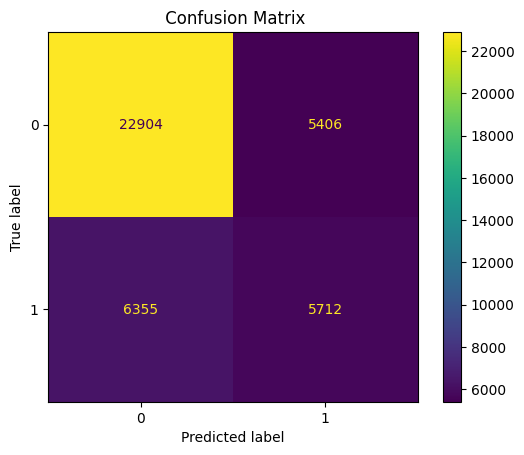

AUC: 0.934


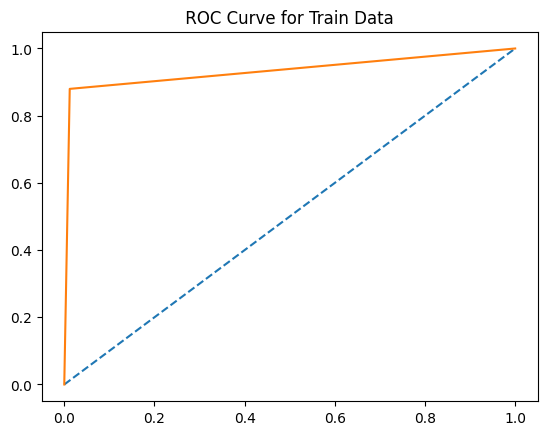

AUC: 0.641


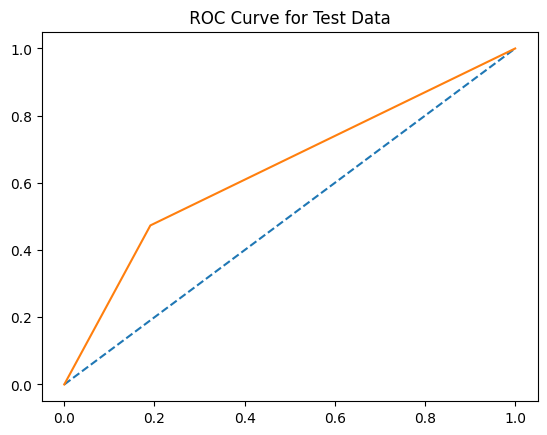

In [45]:
model_analyze(dtc)

C:\Users\donku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--------------------Training Set--------------------

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     66101
           1       0.90      0.96      0.93     28112

    accuracy                           0.96     94213
   macro avg       0.94      0.96      0.95     94213
weighted avg       0.96      0.96      0.96     94213


----------------------Test Set----------------------

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     28310
           1       0.52      0.57      0.54     12067

    accuracy                           0.71     40377
   macro avg       0.66      0.67      0.67     40377
weighted avg       0.72      0.71      0.72     40377



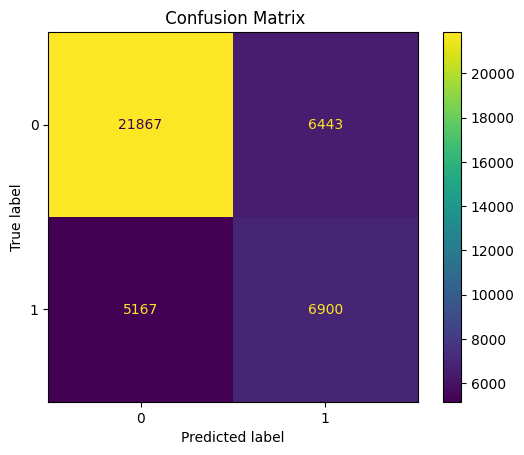

AUC: 0.957


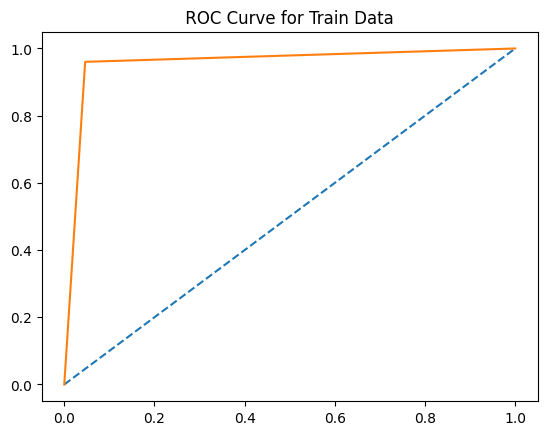

AUC: 0.672


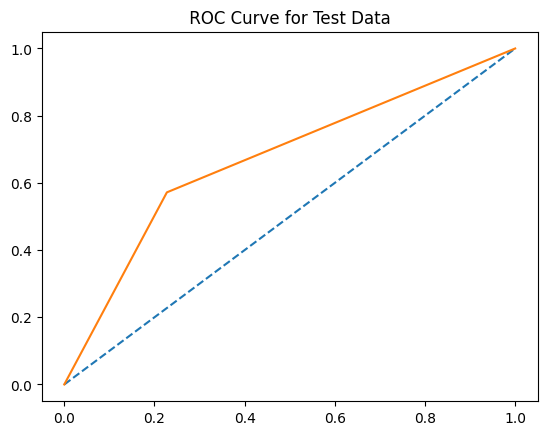

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(estimator=dtc)
model_analyze(ada)

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(200,1000,10)]


--------------------Training Set--------------------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     66101
           1       0.92      0.93      0.93     28112

    accuracy                           0.96     94213
   macro avg       0.95      0.95      0.95     94213
weighted avg       0.96      0.96      0.96     94213


----------------------Test Set----------------------

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     28310
           1       0.52      0.52      0.52     12067

    accuracy                           0.71     40377
   macro avg       0.66      0.66      0.66     40377
weighted avg       0.71      0.71      0.71     40377



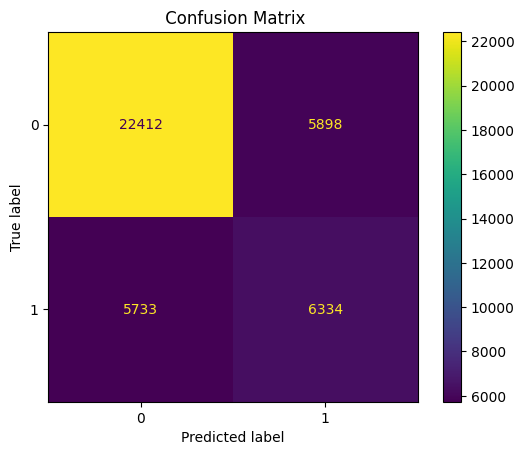

AUC: 0.948


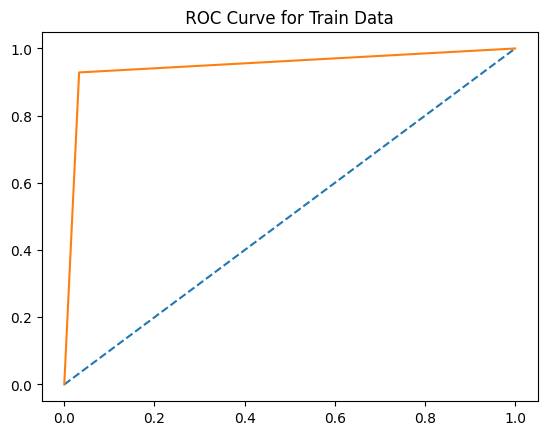

AUC: 0.658


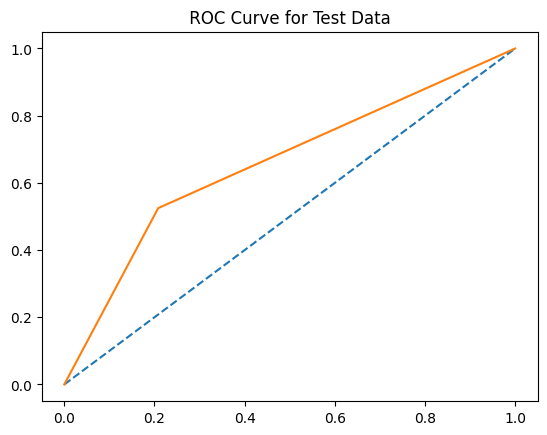

In [47]:
from sklearn.ensemble import RandomForestClassifier
rdc=RandomForestClassifier(random_state=0, n_jobs=-1)
model_analyze(rdc)


--------------------Training Set--------------------

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     66101
           1       0.68      0.69      0.69     28112

    accuracy                           0.81     94213
   macro avg       0.77      0.78      0.78     94213
weighted avg       0.81      0.81      0.81     94213


----------------------Test Set----------------------

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     28310
           1       0.50      0.51      0.51     12067

    accuracy                           0.70     40377
   macro avg       0.65      0.65      0.65     40377
weighted avg       0.70      0.70      0.70     40377



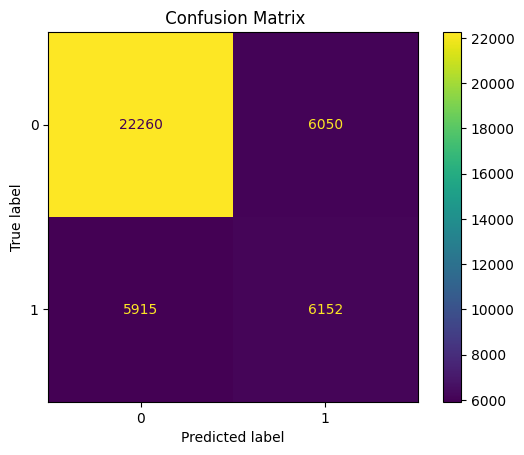

AUC: 0.776


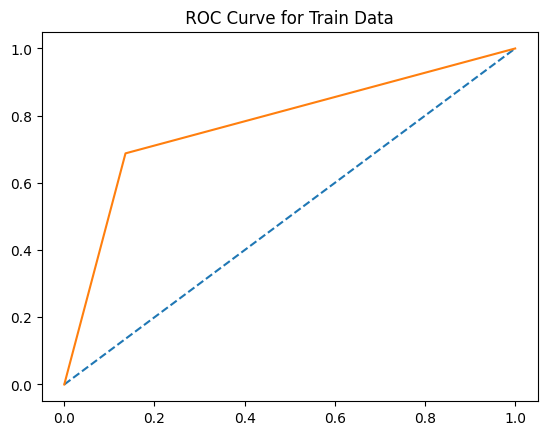

AUC: 0.648


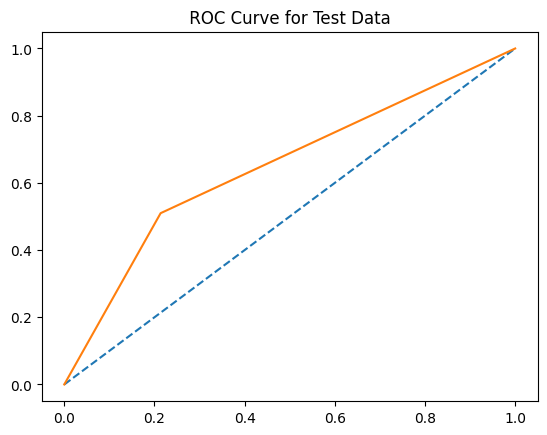

In [48]:
#kNN Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
model_analyze(knn_model)


--------------------Training Set--------------------

              precision    recall  f1-score   support

           0       0.92      0.66      0.77     66101
           1       0.52      0.87      0.65     28112

    accuracy                           0.73     94213
   macro avg       0.72      0.77      0.71     94213
weighted avg       0.80      0.73      0.74     94213


----------------------Test Set----------------------

              precision    recall  f1-score   support

           0       0.92      0.66      0.77     28310
           1       0.52      0.86      0.65     12067

    accuracy                           0.72     40377
   macro avg       0.72      0.76      0.71     40377
weighted avg       0.80      0.72      0.73     40377



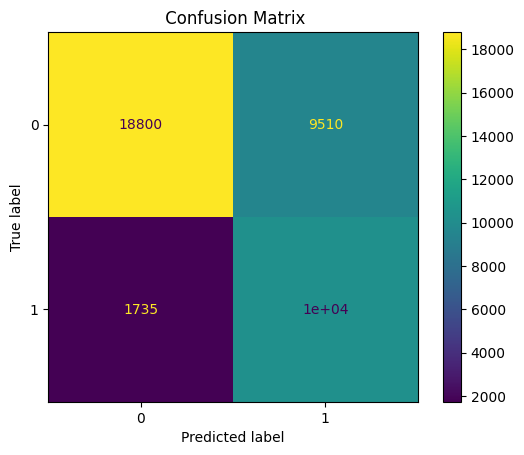

AUC: 0.767


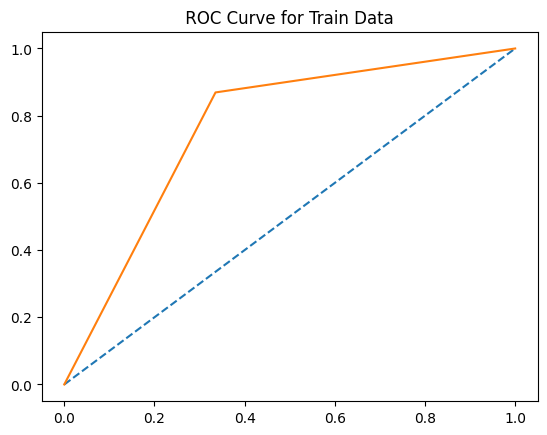

AUC: 0.760


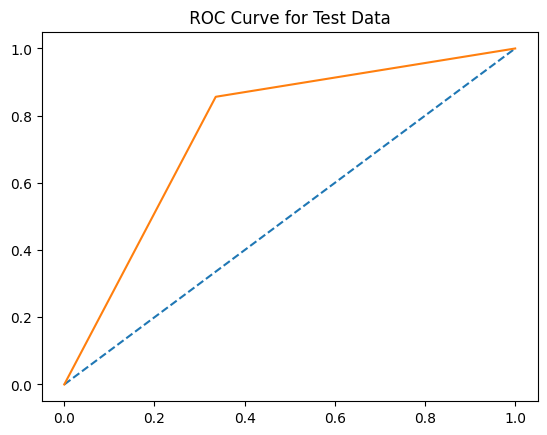

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
model_analyze(gb)


--------------------Training Set--------------------

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66101
           1       0.51      0.99      0.68     28112

    accuracy                           0.72     94213
   macro avg       0.75      0.80      0.71     94213
weighted avg       0.85      0.72      0.73     94213


----------------------Test Set----------------------

              precision    recall  f1-score   support

           0       0.99      0.61      0.76     28310
           1       0.52      0.99      0.68     12067

    accuracy                           0.72     40377
   macro avg       0.76      0.80      0.72     40377
weighted avg       0.85      0.72      0.73     40377



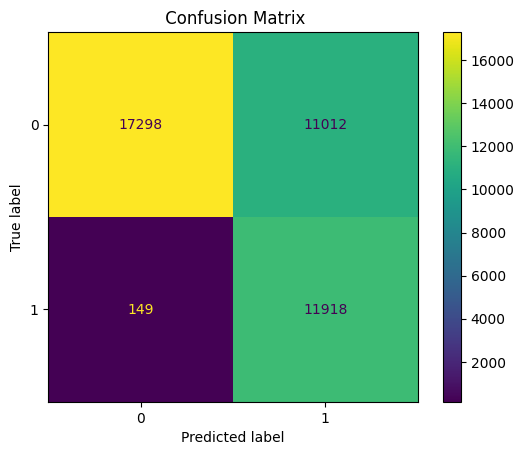

AUC: 0.795


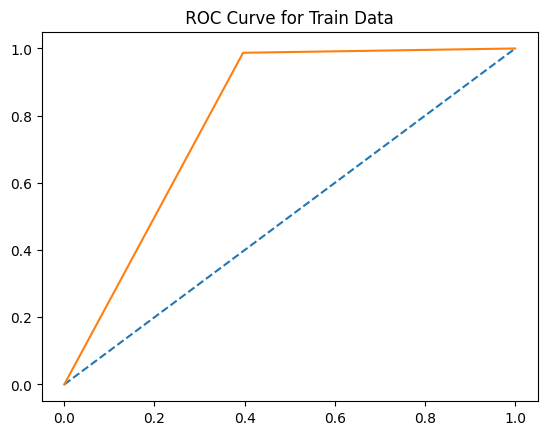

AUC: 0.799


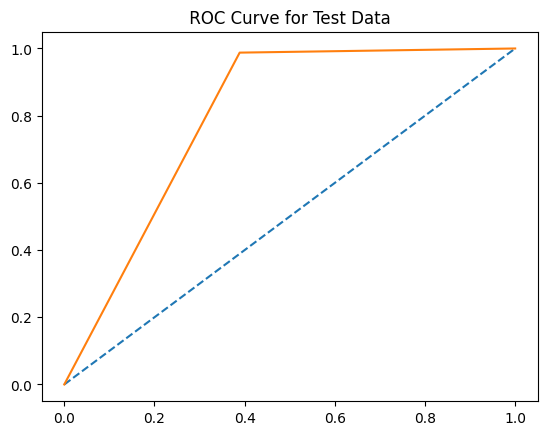

In [50]:
#Gaussian Nearest Neighbour
from sklearn.linear_model import LogisticRegression
nb_model = LogisticRegression()
model_analyze(nb_model)


--------------------Training Set--------------------

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     66101
           1       0.51      1.00      0.68     28112

    accuracy                           0.72     94213
   macro avg       0.76      0.80      0.71     94213
weighted avg       0.86      0.72      0.73     94213


----------------------Test Set----------------------

              precision    recall  f1-score   support

           0       1.00      0.61      0.75     28310
           1       0.52      1.00      0.68     12067

    accuracy                           0.72     40377
   macro avg       0.76      0.80      0.72     40377
weighted avg       0.86      0.72      0.73     40377



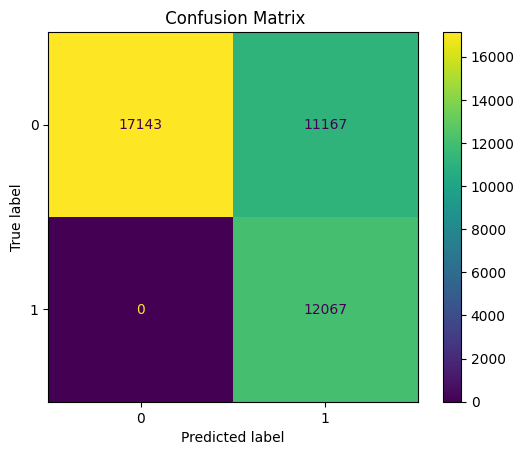

AUC: 0.799


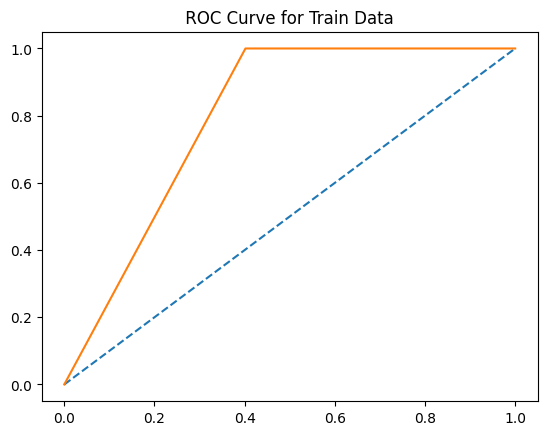

AUC: 0.803


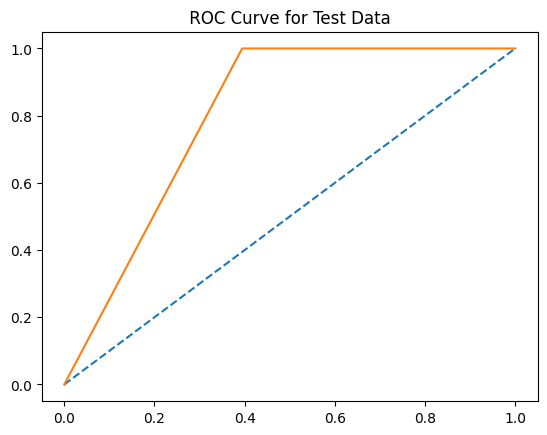

In [51]:
#Gaussian Nearest Neighbour
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
model_analyze(nb_model)